In [1]:
#!pip install wordcloud
#!pip install gensim
#!pip install pywaffle
#!pip install keras
#!pip install tensorflow
!pip install spacy

  Found existing installation: tqdm 4.32.1
    Uninstalling tqdm-4.32.1:
      Successfully uninstalled tqdm-4.32.1
  Found existing installation: importlib-metadata 0.17
    Uninstalling importlib-metadata-0.17:
      Successfully uninstalled importlib-metadata-0.17


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [2]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.collocations import *
try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))
#stopwords

### On fait une fonction qui crée un csv avec le texte

In [3]:
import csv
import io
import spacy
import numpy as np

In [6]:
#pour Adrien
def creation_csv(nom_livre,numero_livre):
    chemin = r"C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\Harry-Python\Data\Books txt\Book " + numero_livre + " - "  + nom_livre + ".txt"
    sortie = r"C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\Harry-Python\Data\Books CSV\Book " + numero_livre + ".csv"
    with io.open(chemin,"r",encoding="utf-8") as infile, open(sortie, 'w',encoding = 'utf-8-sig') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        writer = csv.writer(outfile)
        writer.writerows(lines)

In [4]:
#Pour Sophie
def creation_csv(nom_livre,numero_livre):
    chemin = r"C:\Users\Sophie\Harry-Python\Data\Book " + numero_livre + " - " + nom_livre + ".txt"
    sortie = r"C:\Users\Sophie\Harry-Python\Data\book" + numero_livre + ".csv"
    with io.open(chemin,"r",encoding="utf-8") as infile, open(sortie, 'w',encoding = 'utf-8-sig') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        writer = csv.writer(outfile)
        writer.writerows(lines)

In [5]:
#On crée un dictionnaire
Books = {'The Philosophers Stone': '1',
        'The Chamber of Secrets': '2',
        'The Prisoner of Azkaban': '3',
        'The Goblet of Fire':'4',
        'The Order of the Phoenix': '5',
        'The Half Blood Prince': '6',
        'The Deathly Hallows': '7'}

In [7]:
#Pour Adrien
#On fait une boucle exécutant la fonction sur chaque élément du dictionnaire
Books_csv = {}
for title, i in Books.items():
    creation_csv(title, i)
    Books_csv['book_' + i] = pd.read_csv(r"C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\Harry-Python\Data\Books CSV\Book " + i + ".csv",encoding = 'utf-8-sig', sep='delimiter', header=None)

<ipython-input-7-a3a912f7bcd0>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Books_csv['book_' + i] = pd.read_csv(r"C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\Harry-Python\Data\Books CSV\Book " + i + ".csv",encoding = 'utf-8-sig', sep='delimiter', header=None)


In [6]:
#Pour Sophie
#On fait une boucle exécutant la fonction sur chaque élément du dictionnaire
Books_csv = {}
for title, i in Books.items():
    creation_csv(title, i)
    Books_csv['book' + i] = pd.read_csv(r"C:\Users\Sophie\Harry-Python\Data\book" + i + ".csv" ,encoding = 'utf-8-sig', sep='delimiter', header=None)

C:\Users\Sophie\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [34]:
Books_csv

{'book1':                                                        0
 0                                                      /
 1                                      THE BOY WHO LIVED
 2      Mr. and Mrs. Dursley, of number four, Privet D...
 3      were proud to say that they were perfectly nor...
 4      thank you very much. They were the last people...
 5           expect to be involved in anything strange or
 6      mysterious, because they just didn’t hold with...
 7                                              nonsense.
 8          Mr. Dursley was the director of a firm called
 9      Grunnings, which made drills. He was a big, beefy
 10      man with hardly any neck, although he did have a
 11        very large mustache. Mrs. Dursley was thin and
 12       blonde and had nearly twice the usual amount of
 13       neck, which came in very useful as she spent so
 14     much of her time craning over garden fences, s...
 15       on the neighbors. The Dursley s had a small son
 16  

In [40]:
Books_csv['book4'].head(100)

0
0                                                   /
1                                    THE RIDDLE HOUSE
2   The villagers of Little Hangleton still called...
3   Riddle House,” even though it had been many years
4   since the Riddle family had lived there. It st...
5   hill overlooking the village, some of its windows
6   boarded, tiles missing from its roof, and ivy ...
7   unchecked over its face. Once a fine-looking m...
8   and easily the largest and grandest building f...
9    around, the Riddle House was now damp, derelict,
10                                    and unoccupied.
11  The Little Hangletons all agreed that the old ...
12  was “creepy.” Half a century ago, something st...
13  and horrible had happened there, something tha...
14  older inhabitants of the village still liked t...
15  when topics for gossip were scarce. The story had
16       been picked over so many times, and had been
17     embroidered in so many places, that nobody was
18  quite sure what the truth was anymore. Every v...
19  of the tale, however, started in the same plac...
20       years before, at daybreak on a fine summer’s
21  morning, when the Riddle House had still been ...
22                                           Page | 2
23  Harry Potter and the Goblet of Fire - J.K. Row...
24  kept and impressive, a maid had entered the dr...
25               room to find all three Riddles dead.
26  The maid had run screaming down the hill into the
27    village and roused as many people as she could.
28  “Lying there with their eyes wide open! Cold a...
29                     Still in their dinner things!”
..                                                ...
70  windows! All Frank had to do was creep up to t...
71              house while we was all sleeping. ...”
72                The villagers exchanged dark looks.
73   “I always thought he had a nasty look about him,
74           right enough,” grunted a man at the bar.
75    “War turned him funny, if you ask me,” said the
76                                          landlord.
77  “Told you I wouldn’t like to get on the wrong ...
78  Frank, didn’t I, Dot?” said an excited woman i...
79                                            corner.
80  “Horrible temper,” said Dot, nodding fervently...
81                   remember, when he was a kid ...”
82  By the following morning, hardly anyone in Little
83  Hangleton doubted that Frank Bryce had killed the
84                                           Riddles.
85                                           Page | 4
86  Harry Potter and the Goblet of Fire - J.K. Row...
87  But over in the neighboring town of Great Hang...
88    in the dark and dingy police station, Frank was
89  stubbornly repeating, again and again, that he...
90  innocent, and that the only person he had seen...
91  the house on the day of the Riddles’ deaths ha...
92   a teenage boy, a stranger, dark-haired and pale.
93  Nobody else in the village had seen any such b...
94  the police were quite sure that Frank had inve...
95                                               him.
96  Then, just when things were looking very serio...
97  Frank, the report on the Riddles’ bodies came ...
98                            and changed everything.
99  The police had never read an odder report. A t...

[100 rows x 1 columns]

In [7]:
# Créer un tableau avec tous les livres
df_books = pd.DataFrame(Books_csv.items(), columns = ['Books', 'Text'])
df_books


Books                                               Text
0  book1                                                ...
1  book2                                                ...
2  book3                                                ...
3  book4                                                ...
4  book5                                                ...
5  book6                                                ...
6  book7                                                ...

In [43]:
df_books['Text'][2]

0
0                                                      /
1                                               OWL POST
2      Harry Potter was a highly unusual boy in many ...
3       For one thing, he hated the summer holidays more
4      than any other time of year. For another, he r...
5      wanted to do his homework but was forced to do...
6      secret, in the dead of night. And he also happ...
7                                           be a wizard.
8        It was nearly midnight, and he was lying on his
9      stomach in bed, the blankets drawn right over his
10     head like a tent, a flashlight in one hand and...
11     leather-bound book (A History of Magic by Bath...
12       Bagshot) propped open against the pillow. Harry
13     moved the tip of his eagle-feather quill down ...
14     frowning as he looked for something that would...
15     him write his essay, “Witch Burning in the Fou...
16          Century Was Completely Pointless — discuss.”
17       The quill paused at the top of a likely-looking
18      paragraph. Harry pushed his round glasses up the
19     bridge of his nose, moved his flashlight close...
20                                       book, and read:
21     Page | 2 Harry Potter and the Prisoner of Azka...
22              Non-magic people (more commonly known as
23     Muggles) were particularly afraid of magic in ...
24     times, but not very good at recognizing it. On...
25     occasion that they did catch a real witch or w...
26     burning had no effect whatsoever. The witch or...
27        would perform a basic Flame Freezing Charm and
28     then pretend to shriek with pain while enjoying a
29     gentle, tickling sensation. Indeed, Wendelin t...
...                                                  ...
14362       Hermione stepped back through the barrier of
14363    platform nine and three-quarters. Harry spotted
14364       Uncle Vernon at once. He was standing a good
14365    distance from Mr. and Mrs. Weasley, eyeing them
14366  suspiciously, and when Mrs. Weasley hugged Har...
14367   greeting, his worst suspicions about them seemed
14368                                         confirmed.
14369  “I’ll call about the World Cup!” Ron yelled af...
14370       as Harry bid him and Hermione good-bye, then
14371  wheeled the trolley bearing his trunk and Hedw...
14372   cage toward Uncle Vernon, who greeted him in his
14373                                     usual fashion.
14374  “What’s that?” he snarled, staring at the enve...
14375  Harry was still clutching in his hand. “If it’...
14376        form for me to sign, you’ve got another — ”
14377  “It’s not,” said Harry cheerfully. “It’s a let...
14378                                        godfather.”
14379  “Godfather?” sputtered Uncle Vernon. “You haven’t
14380                                  got a godfather!”
14381  Page | 486 Harry Potter and the Prisoner of Az...
14382  “Yes, I have,” said Harry brightly. “He was my...
14383  and dad’s best friend. He’s a convicted murder...
14384  he’s broken out of wizard prison and he’s on t...
14385  He likes to keep in touch with me, though ... ...
14386          with my news ... check if I’m happy. ...”
14387  And, grinning broadly at the look of horror on...
14388  Vernon’s face, Harry set off toward the statio...
14389  Hedwig rattling along in front of him, for wha...
14390           like a much better summer than the last.
14391  Page | 487 Harry Potter and the Prisoner of Az...

[14392 rows x 1 columns]

In [8]:
#On veut éliminer le numéro de page hyper relou
import re
pattern = ["Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Philosophers Stone[\s]?-[\s]?J.K. Rowling",
           "Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Chamber of Secrets[\s]?-[\s]?J.K. Rowling",
          "Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Prisoner of Azkaban[\s]?-[\s]?J.K. Rowling",
          "Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Goblet of Fire[\s]?-[\s]?J.K. Rowling",
          "Page[\s]?\|[\s]?[l0-9]?[lOU0-9]?[lOU0-9]?[lOU0-9][\s]?Harry Potter and the Order of the Phoenix[\s]?-[\s]?J.K. Rowling",
          "Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Half Blood Prince[\s]?-[\s]?J.K. Rowling",
          "Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Deathly Hallows[\s]?-[\s]?J.K. Rowling"]

In [9]:
def clean_page(text, pattern):
    for ele in pattern:
        liste_regex = re.findall(ele, text, re.IGNORECASE)
        for expression in liste_regex:
            text = text.replace(expression, '')
    return text

In [10]:
#Test de la fonction sur un livre
text = ''.join([text for text in Books_csv['book1'][0]])
print(clean_page(text, pattern)[:1000])

/THE BOY WHO LIVEDMr. and Mrs. Dursley, of number four, Privet Drive,were proud to say that they were perfectly normal,thank you very much. They were the last people you’dexpect to be involved in anything strange ormysterious, because they just didn’t hold with suchnonsense.Mr. Dursley was the director of a firm calledGrunnings, which made drills. He was a big, beefyman with hardly any neck, although he did have avery large mustache. Mrs. Dursley was thin andblonde and had nearly twice the usual amount ofneck, which came in very useful as she spent somuch of her time craning over garden fences, spyingon the neighbors. The Dursley s had a small soncalled Dudley and in their opinion there was no finerboy anywhere.The Dursleys had everything they wanted, but theyalso had a secret, and their greatest fear was thatsomebody would discover it. They didn’t think theycould bear it if anyone found out about the Potters.Mrs. Potter was Mrs. Dursley’s sister, but they hadn’tmet for several years; 

In [11]:
#Création du même dictionnaire mais avec texte fusionné pour chaque tome
all_text = Books_csv.copy()
for i in Books_csv:
    all_text[i] = ' '.join([text for text in Books_csv[i][0]])

In [12]:
#Application de la fonction au dictionnaire des livres
for i in all_text:
    all_text[i] = clean_page(all_text[i], pattern)


In [16]:
#Longueur de chaque livre (avant d'enlever les numéros de pages)
#for i in all_text:
    #print('Number of words in '+i,' :', len(all_text[i]))

In [49]:
#Longueur de chaque livre (après)
for i in all_text:
    print('Number of words in '+i,' :', len(all_text[i]))

Number of words in book1  : 436757
Number of words in book2  : 490573
Number of words in book3  : 623529
Number of words in book4  : 1100456
Number of words in book5  : 1486443
Number of words in book6  : 980191
Number of words in book7  : 1136459


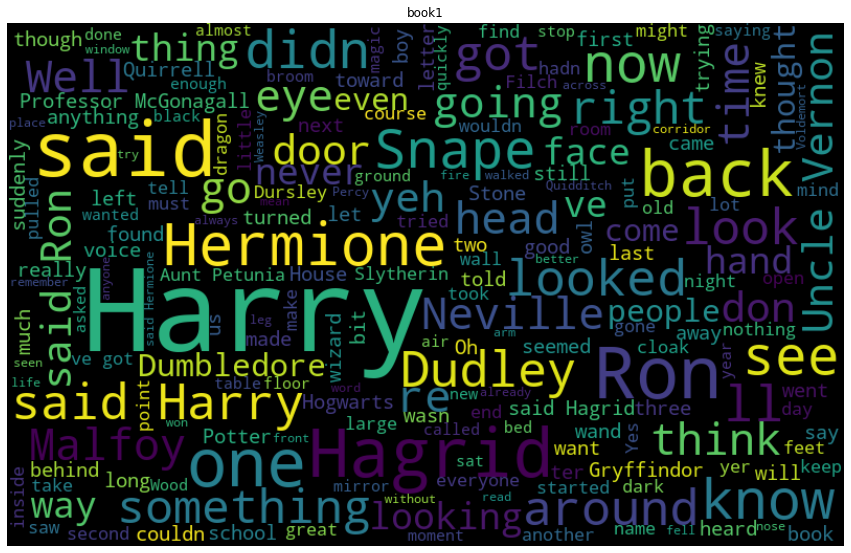

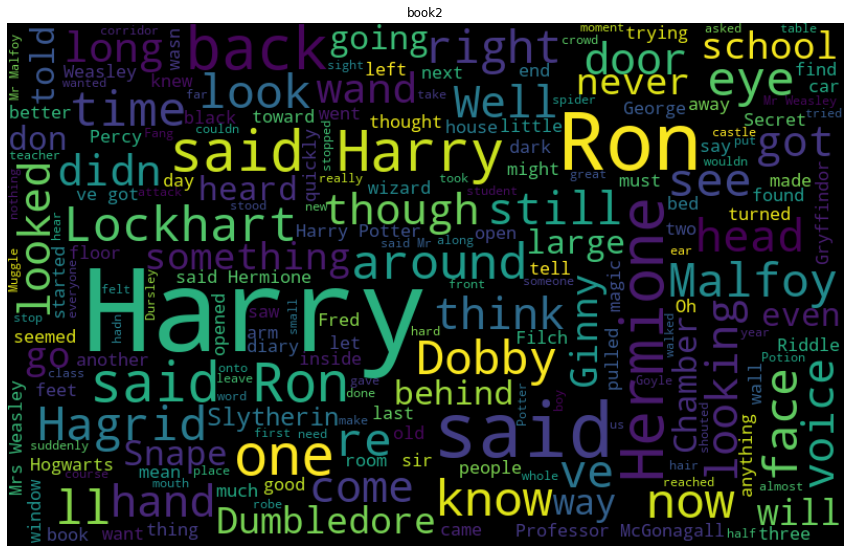

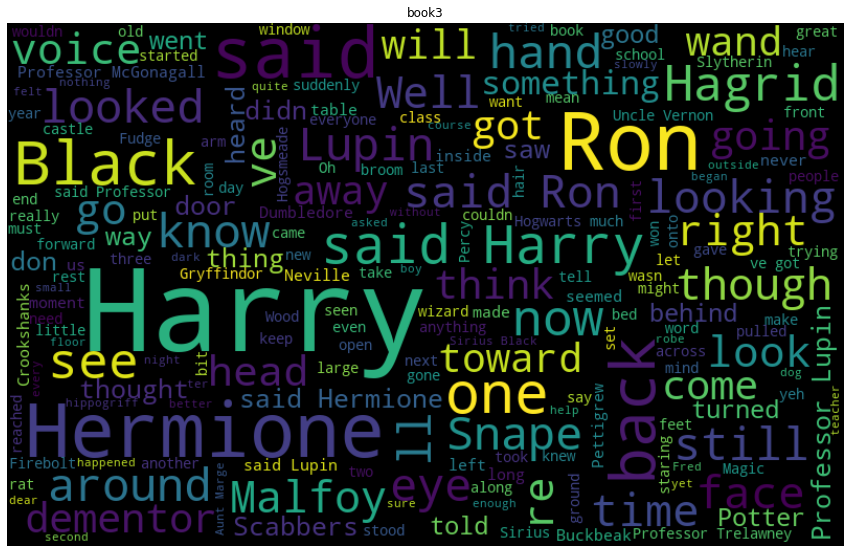

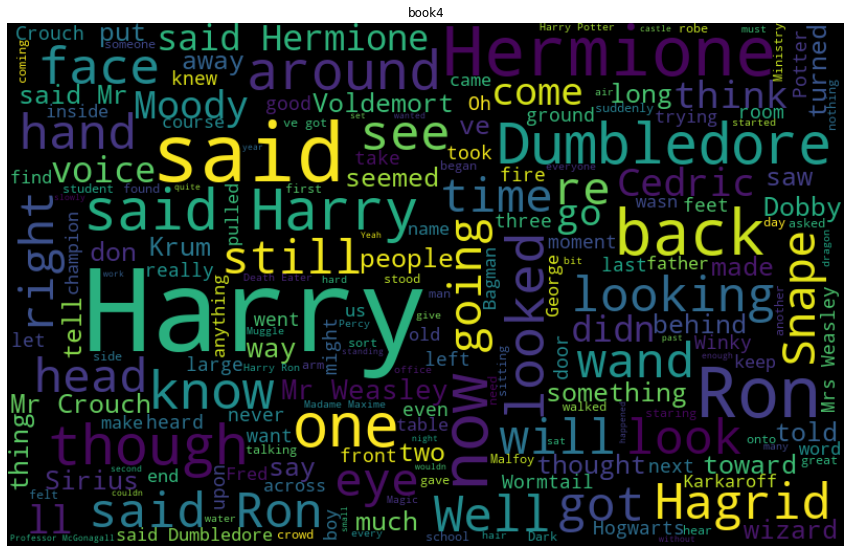

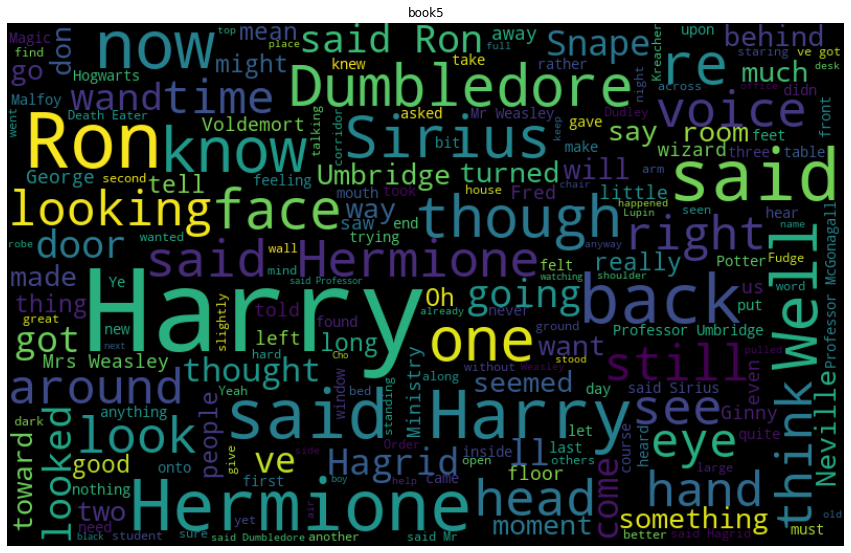

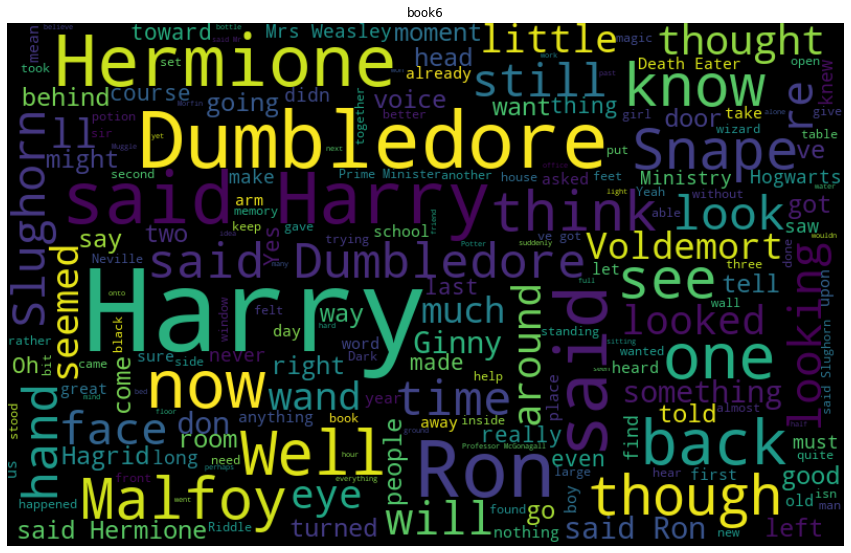

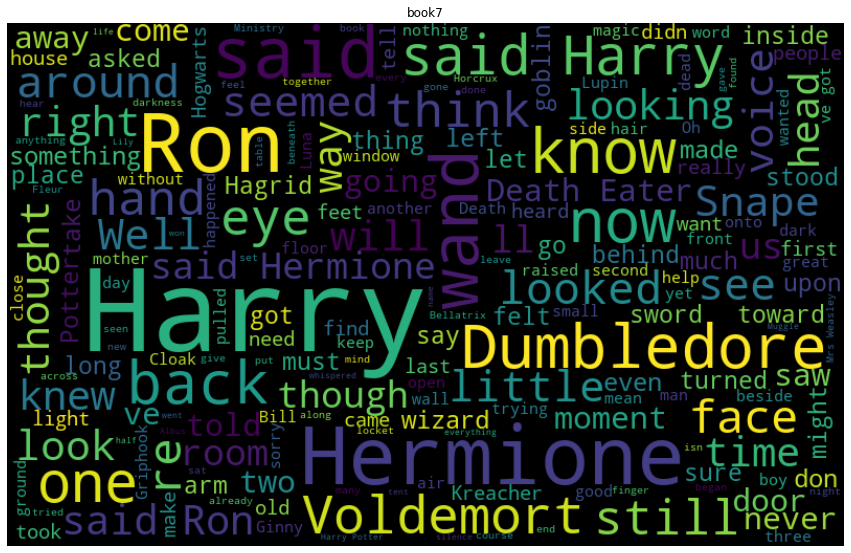

In [50]:
# Word cloud for entire training dataset
# default width=400, height=200
for i in all_text:
    wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text[i])
    plt.figure(figsize=(15, 12))
    plt.title(i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off');

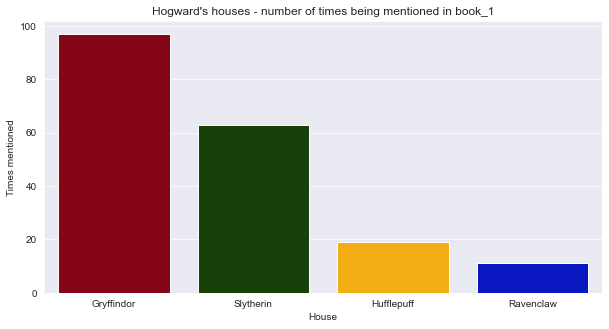

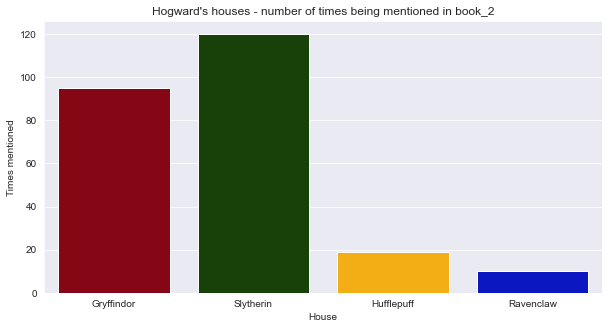

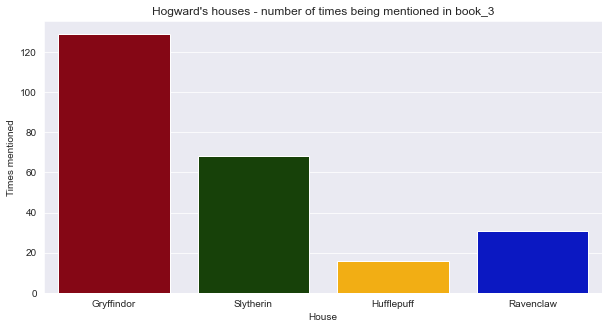

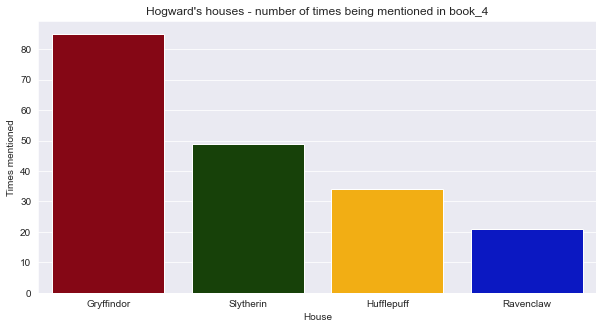

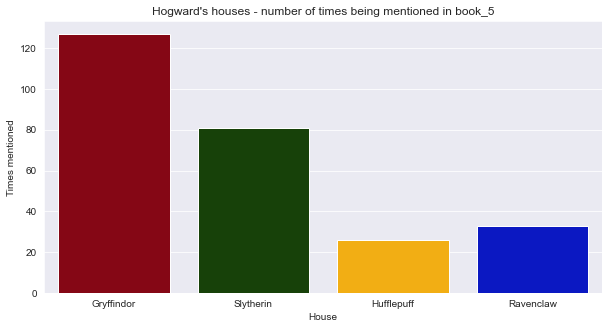

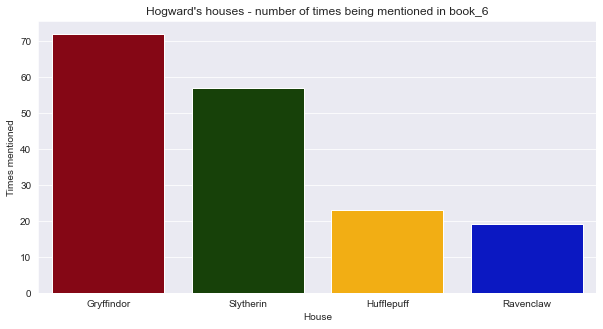

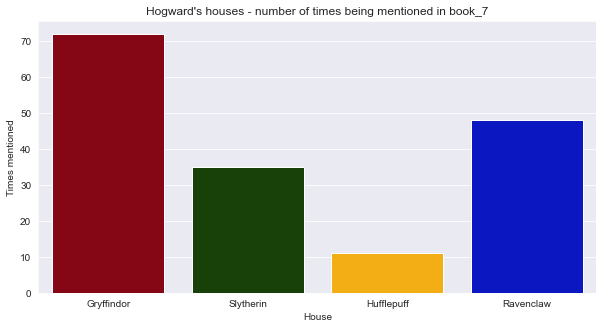

In [69]:
for i in all_text:
    Slytherin = all_text[i].count("Slytherin")
    Gryffindor = all_text[i].count("Gryffindor")
    Hufflepuff = all_text[i].count("Hufflepuff")
    Ravenclaw = all_text[i].count("Ravenclaw")
    house_list = [['Gryffindor', Gryffindor], ['Slytherin', Slytherin], ['Hufflepuff', Hufflepuff], ['Ravenclaw', Ravenclaw]]
    df_house= pd.DataFrame(house_list, columns=['House', 'Times mentioned'])
    colors = ["crimson", "forrest green", "amber", "true blue"]
    sns.set_style("darkgrid")
    plt.figure(figsize=(10, 5))
    with sns.xkcd_palette(colors):
        sns.barplot(x="House", y="Times mentioned", saturation=0.9, data=df_house).set_title("Hogward's houses - number of times being mentioned in "+i)

In [19]:
#tokenisation pour avoir un texte "clean"
#nltk.download('punkt')
all_text_clean = all_text.copy()

for i in all_text:
    
    text_list = nltk.tokenize.word_tokenize(all_text[i])
    text_list = [x.lower() for x in text_list]
    text_clean = [w.lower() for w in text_list if w not in stopwords and w.isalpha()]
    text_clean = ' '.join(text.lower() for text in text_clean)
    all_text_clean[i] = text_clean

In [21]:
all_text_clean['book5'][:1000]

'harry potter dudley demented hottest day summer far drawing close drowsy silence lay large square houses privet drive cars usually gleaming stood dusty drives lawns emerald green lay parched yellowing use hosepipes banned due drought deprived usual pursuits inhabitants privet drive retreated shade cool houses windows thrown wide hope tempting nonexistent breeze person left outdoors teenage boy lying flat back flower bed outside number four skinny bespectacled boy pinched slightly unhealthy look someone grown lot short space time jeans torn dirty baggy faded soles trainers peeling away uppers harry potter appearance endear neighbors sort people thought scruffiness ought punishable law hidden behind large hydrangea bush evening quite invisible passersby fact way would spotted uncle vernon aunt petunia stuck heads living room window looked straight flower bed whole harry thought congratulated idea hiding perhaps comfortable lying hot hard earth hand nobody glaring grinding teeth loudly c

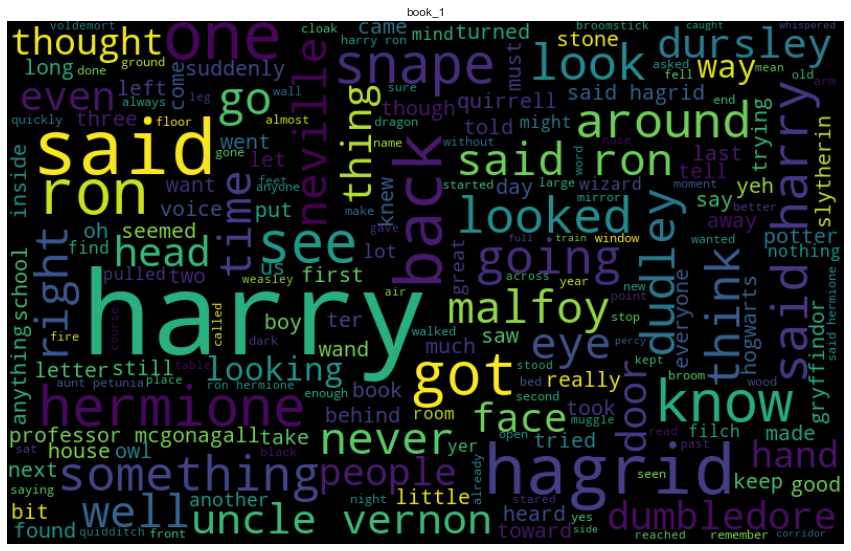

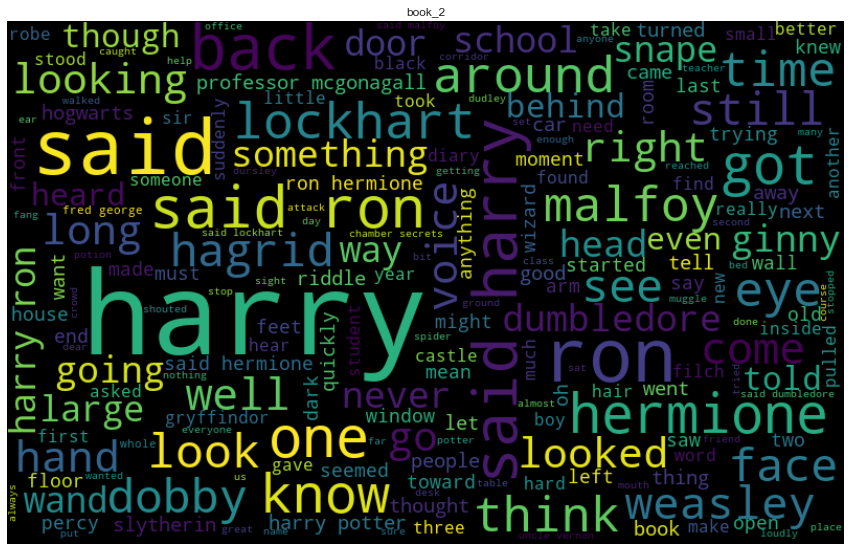

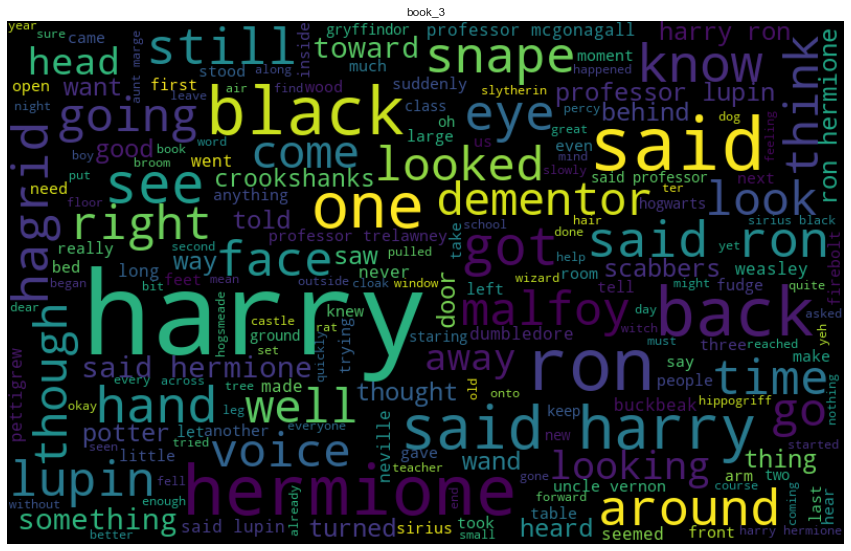

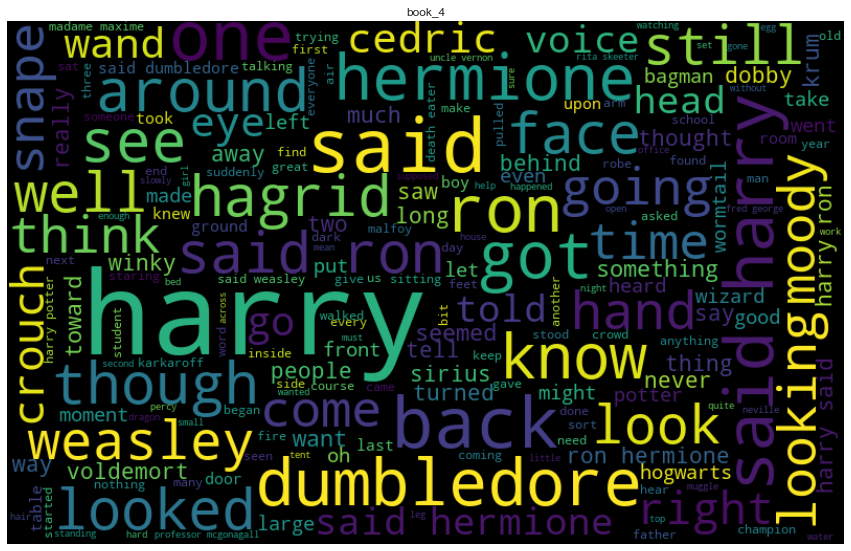

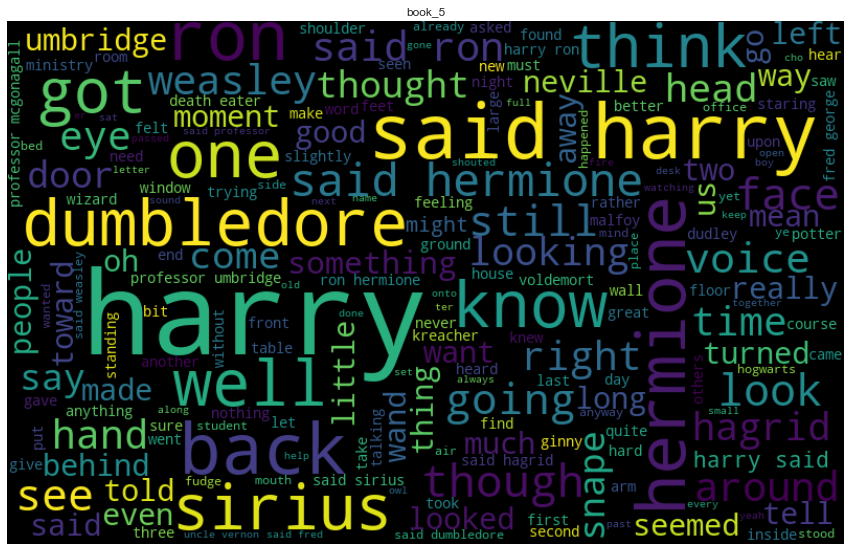

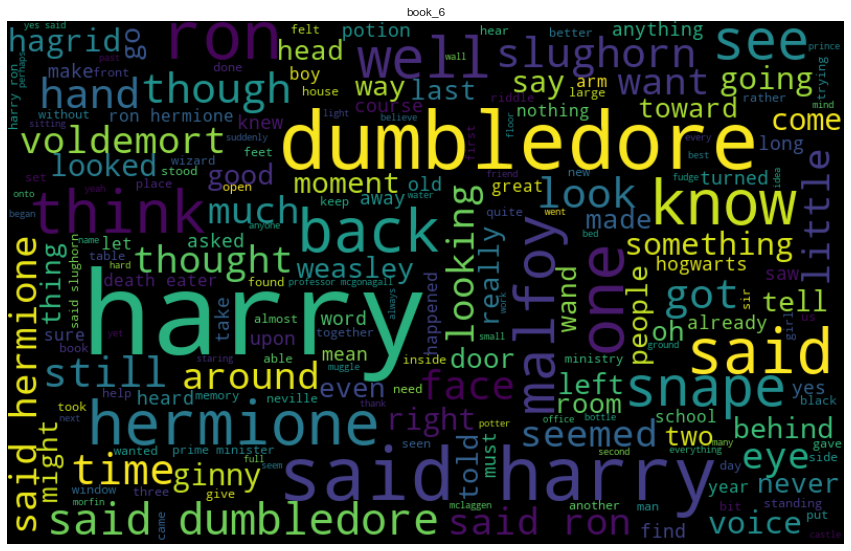

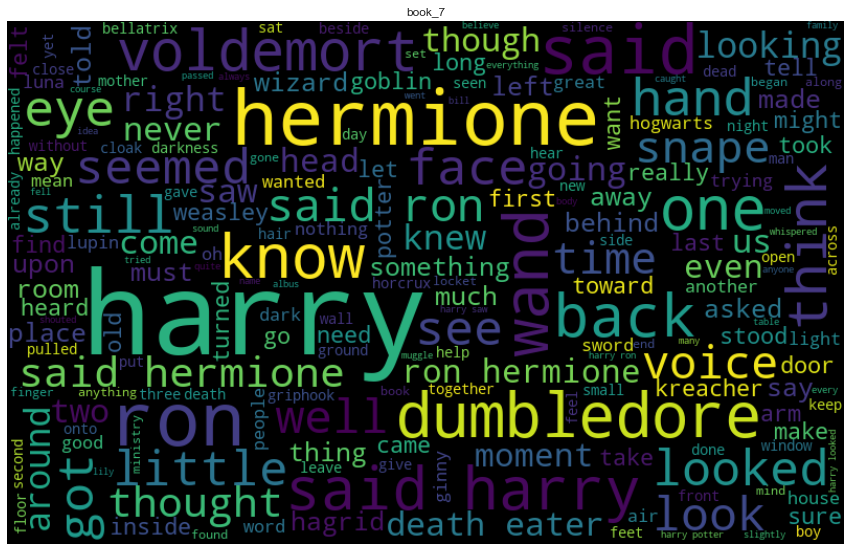

In [72]:
for i in all_text_clean:
    wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text_clean[i])
    plt.figure(figsize=(15, 12))
    plt.title(i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off');

In [51]:
def most_common_word(text_clean):
    text_clean_list = text_clean.split()
    text_counts = Counter(text_clean_list)
    text_common_words = [word[0] for word in text_counts.most_common(25)]
    text_common_counts = [word[1] for word in text_counts.most_common(25)]

    return text_common_words, text_common_counts

In [54]:
#Création d'un dictionnaire avec les mots les plus utilisés par tome
hp_most_common = {}
for i in all_text_clean:
    hp_most_common[i] = most_common_word(all_text_clean[i])

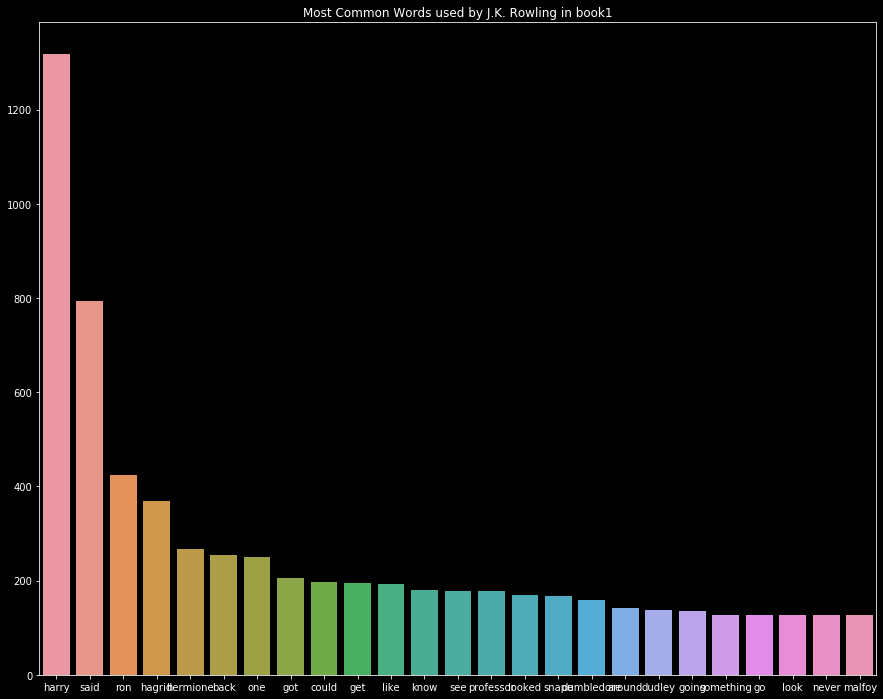

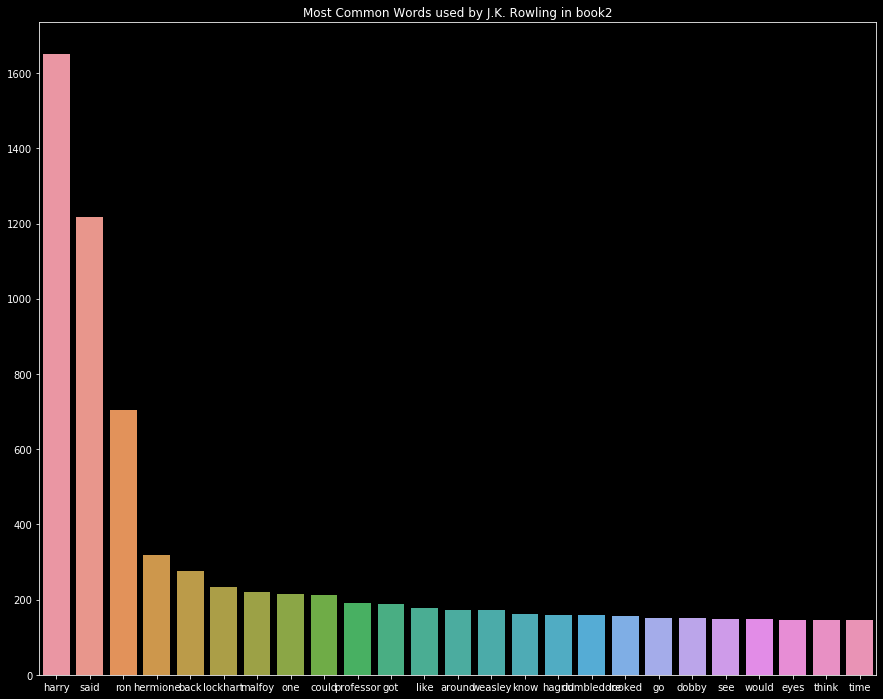

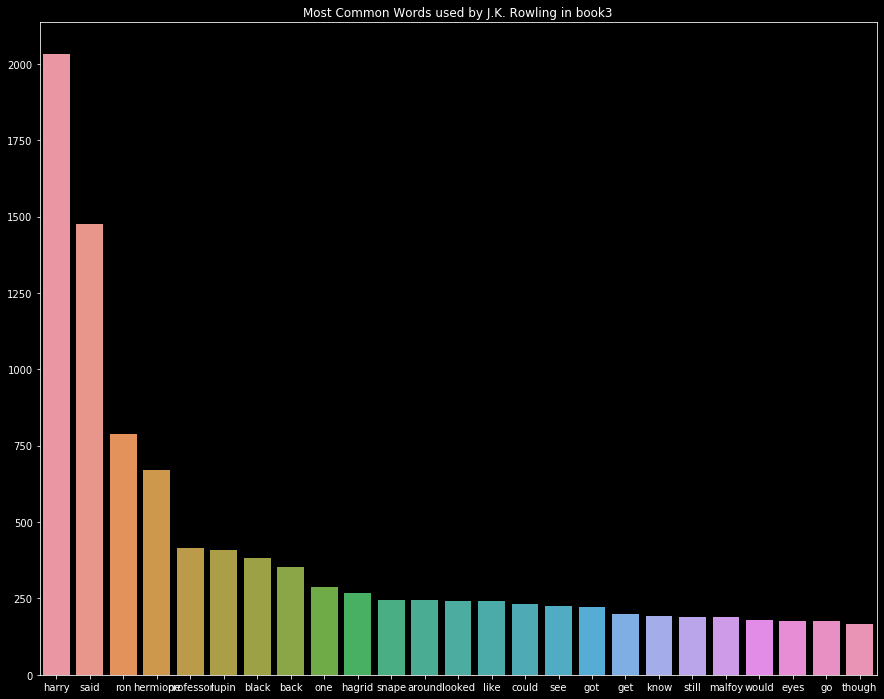

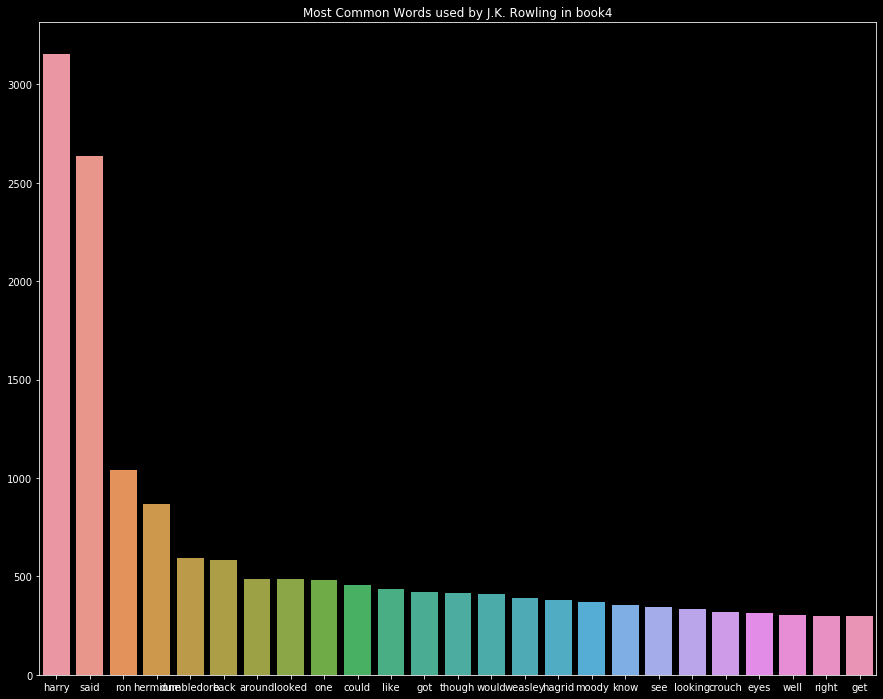

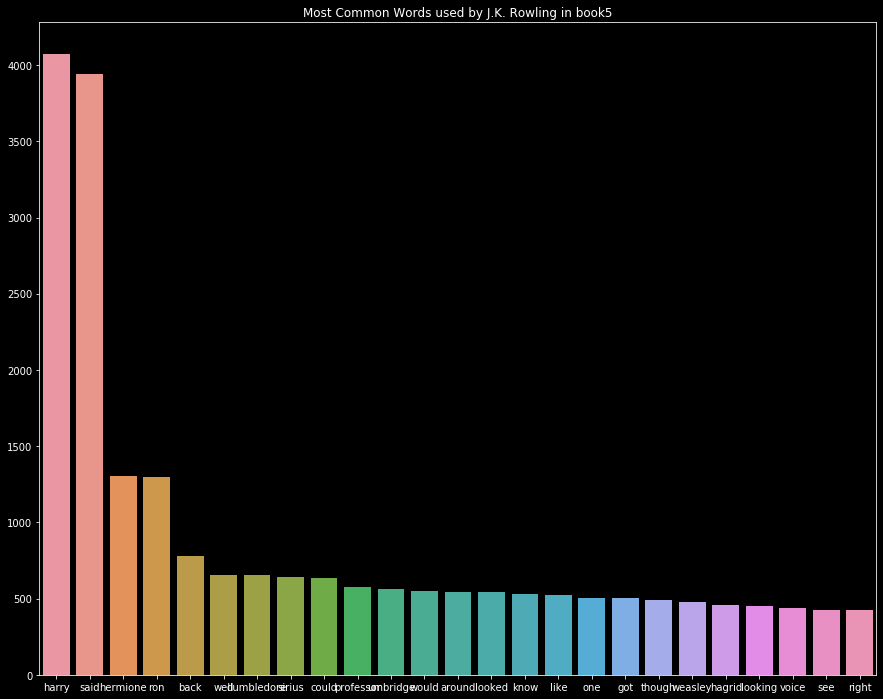

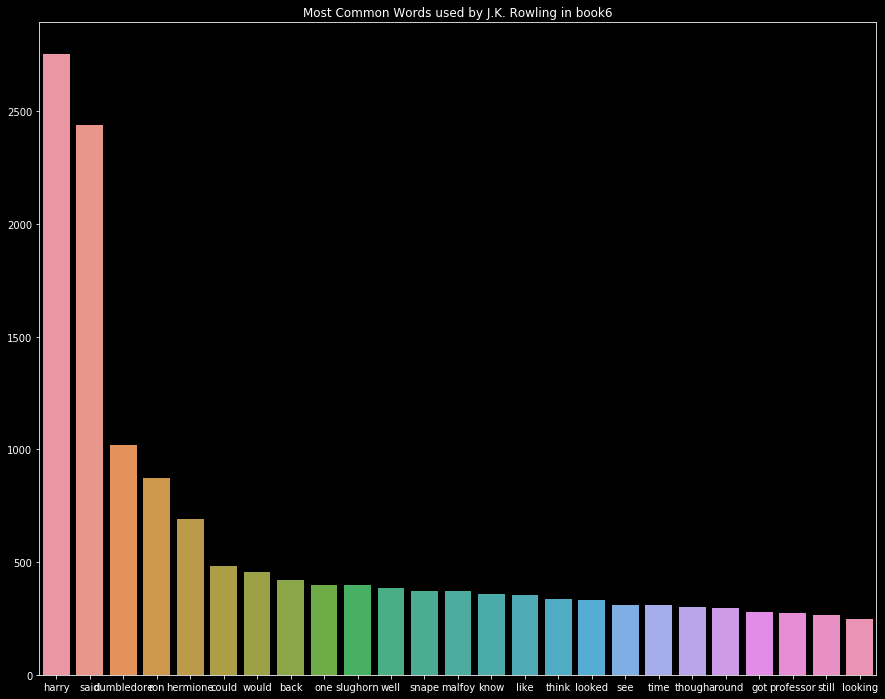

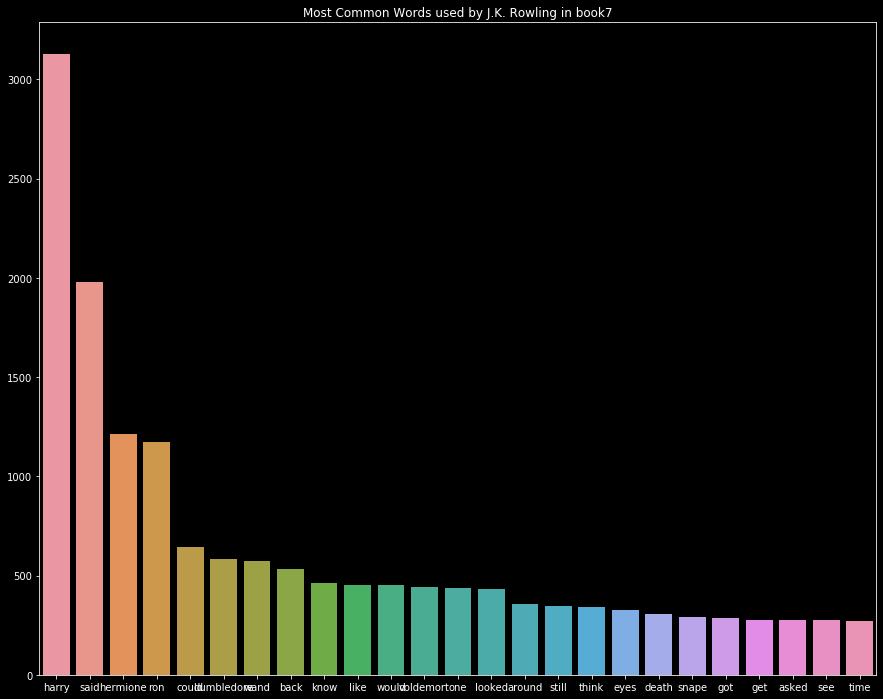

In [55]:
#Graphique
for i in hp_most_common:
        plt.style.use('dark_background')
        plt.figure(figsize=(15, 12))
        words = hp_most_common[i][0]
        count = hp_most_common[i][1]
        sns.barplot(x = words, y = count)
        plt.title('Most Common Words used by J.K. Rowling in ' +i)

In [84]:
#def supp_chap(text):
    #pattern = (
           #    "([A-Z]+)\\b(?!([A-Z]+(?=\.))\\b)"+"(?![a-z']|[A-Z.])")
               # Selects the chapter title but excludes all
               # caps word beginning first sentence of the chapter
               # chapter title ends before lowercase letters or a period
                
 #   tous_chaps = re.findall(pattern, text)
  #  print(tous_chaps)
   # i = 1
   # for chaps in tous_chaps:
    #    text = text.replace(str(chaps),str(i))
     #   i = i+1
            #print(expression)
   # print(text)

In [23]:
#supp_chap(all_text['book2'])

In [13]:
def noms_propres(text):
    #on met le texte tokenized
    text = nltk.word_tokenize(text)
    text = nltk.pos_tag(text)
    
    nnp = []
    noms = []
    noms_final = []
    for i,element in enumerate(text):
        
        if element[0] in ["You-Know-Who","Know-Who","Lord"]:
                element = ("Voldemort",element[1])
            
        if element[0] == "Severus" and text[i+1][0] != "Snape":
                element = ("Snape",element[1])
                
        if element[0] == "Albus" and text[i+1][0] != "Dumbledore":
                element = ("Dumbledore",element[1])
            
        if element[0] == "Granger" and text[i-1][0] != "Hermione":
                element = ("Hermione",element[1])
                
        if element[0] == "Potter" and text[i-1][0] != "Harry":
                element = ("Harry",element[1])
        
        if element[0] == "Draco" and text[i+1][0] != "Malfoy":
                element = ("Malfoy",element[1])
        
        if element[0] == "Aunt" and text[i-1][0] != "Petunia":
                element = ("Petunia",element[1])
        
        if element[0] == "Uncle"and text[i-1][0] != "Vernon":
                element = ("Vernon",element[1])
        
        if element[0] == "Professor":
                element = (" ",element[1])
        #Professor revient beaucoup mais ne nous apporte pas d'information: soit un perso s'adresse à lui directement dans
        #dans ce cas super difficile de séparer les cas
        #soit il est référencé par la suite avec son nom qui suit
        
        if element[1] == "NNP" and len(element[0]) > 2 :
            
            nnp.append(element[0])
    
    for nom in nnp:
        count = nnp.count(str(nom))
        noms.append([str(nom),count])
   
    noms = sorted(noms,key = lambda item: item[1], reverse = True)

    for i in noms:
        if i not in noms_final:
            noms_final.append(i)

    noms_final = noms_final[:13]
    
    return (noms_final)

In [14]:
noms_freq = noms_propres(all_text["book1"])

In [15]:
df_noms = pd.DataFrame(noms_freq, columns = ['Noms', 'Fréquence'])
df_noms

Noms  Fréquence
0        Harry       1381
1          Ron        424
2       Hagrid        369
3     Hermione        264
4       Vernon        225
5        Snape        165
6   Dumbledore        151
7       Dudley        136
8       Malfoy        127
9      Neville        116
10    Quirrell        112
11     Petunia        109
12  McGonagall         99

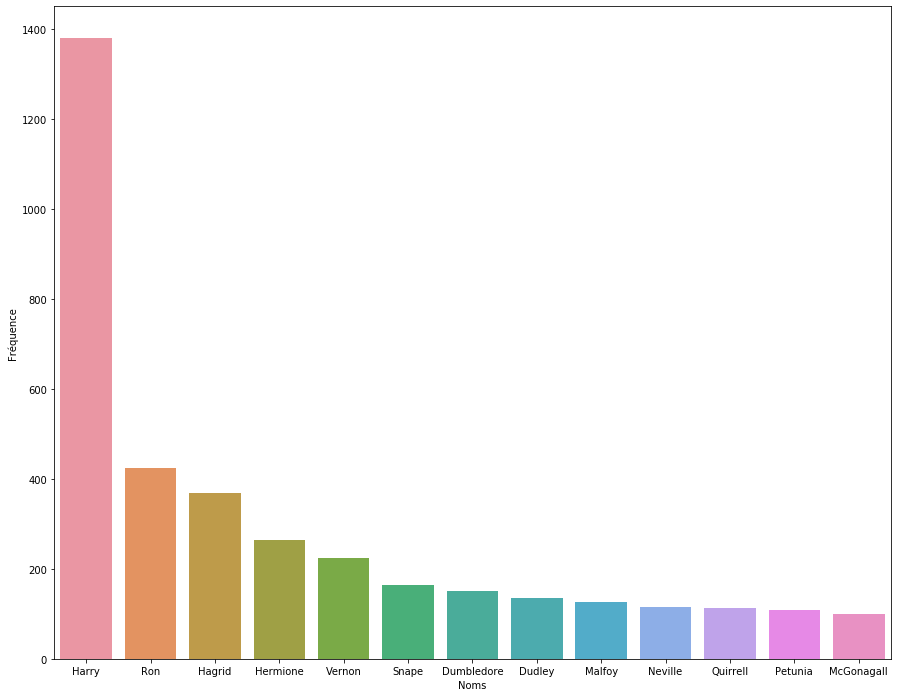

In [16]:
plt.figure(figsize=(15, 12))
sns.barplot(x = df_noms.Noms, y = df_noms.Fréquence)

In [22]:
#Travail sur la relation entre personnages
all_text_clean_list = all_text_clean.copy()
for i in all_text_clean:
    all_text_clean_list[i] = all_text_clean[i].split()


harry = ['harry', 'harry potter']
ron = ['ron', 'ron weasley']
hermione = ['hermione granger','hermione']
ginny = ['ginny weasley', 'ginny']
dumbledore = ['albus dumbledore', 'dumbledore']
sirius = ['sirius black', 'sirius']
snape = ['severus snape', 'snape']
luna = ['luna lovegood', 'luna']
hagrid = ['rubeus hagrid', 'hagrid']
dobby = ['dobby']
voldemort = ['tom riddle', 'voldemort', 'you-know-who', 'know-who', 'lord']

In [23]:
#Fonction récupérant l'index de chaque apparition d'un personnage
def occurence(text_list, perso):
    occurence_all = []
    for i in text_list:
        occurence = []
        for idx, word in enumerate(text_list[i]):
            if word in perso:
                occurence.append(idx)
        occurence_all.append(occurence)
    return occurence_all

In [24]:
harry_occ = occurence(all_text_clean_list, harry)
ron_occ = occurence(all_text_clean_list, ron)
hermione_occ = occurence(all_text_clean_list, hermione)
ginny_occ = occurence(all_text_clean_list, ginny)
dumbledore_occ = occurence(all_text_clean_list, dumbledore)
sirius_occ = occurence(all_text_clean_list, sirius)
snape_occ = occurence(all_text_clean_list, snape)
luna_occ = occurence(all_text_clean_list, luna)
hagrid_occ = occurence(all_text_clean_list, hagrid)
dobby_occ = occurence(all_text_clean_list, dobby)
voldemort_occ = occurence(all_text_clean_list, voldemort)

In [25]:
#Fonction calculant un score de proximité entre deux personnages
def relation(perso_pdv, perso_cible):   #les arguments sont les listes d'index trouvées précédemment
    score_all = []
    for i in range(0,7): #on boucle sur tous les livres
        liens = 0   #compteur de liens
        list_index = []
        for idx in perso_pdv[i]:
            #on considère que deux personnages ont une interaction s'ils sont à moins de 40 mots d'écart
            idx_bas = idx - 40
            idx_haut = idx + 40
        
            for index in perso_cible[i]: 
                if (idx_bas <= index <= idx_haut):
                    liens += 1                     #si les index sont proches, on incrémante le compteur de liens
                    list_index.append([idx, index])
        max_lien = float(len(perso_pdv[i]))  #on calcule le nombre de liens potentiels max 
                                      #(= le nombre d'apparition du personnage)
        liens_uniques = []
        for ele in list_index:
            if ele[0] not in liens_uniques:
                liens_uniques.append(ele[0])    
        score = ((len(liens_uniques) / max_lien)*100) #on fait le ratio entre le nombre de lien et le nombre de liens max
        score_all.append(score) #on stocke le score de chaque livre
    return score_all

In [26]:
#On applique la fonction au trio principal
harry2ron = relation(harry_occ, ron_occ)
ron2harry = relation(ron_occ, harry_occ)
harry2hermione = relation(harry_occ, hermione_occ)
hermione2harry = relation(hermione_occ, harry_occ)
ron2hermione = relation(ron_occ, hermione_occ)
hermione2ron = relation(hermione_occ, ron_occ)

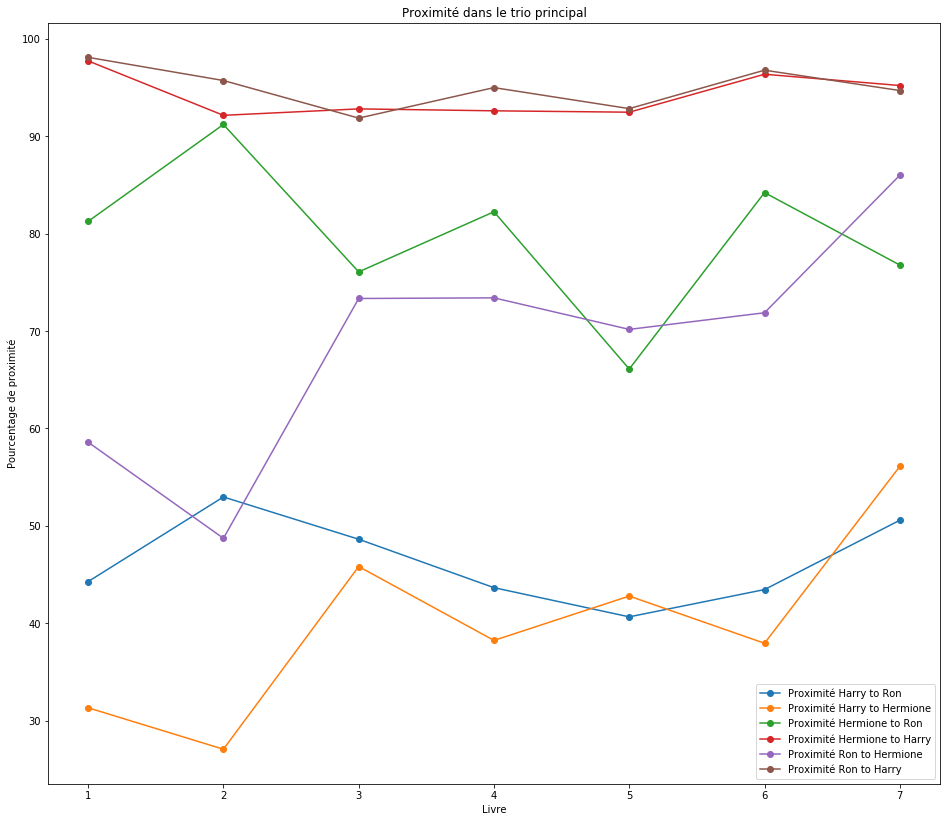

In [27]:
#Graphique
x = np.linspace(1,7,7)
plt.figure(figsize=(16,14))
plt.plot(x, harry2ron, marker = 'o', label = 'Proximité Harry to Ron')
plt.plot(x, harry2hermione, marker = 'o', label = 'Proximité Harry to Hermione')
plt.plot(x, hermione2ron, marker = 'o', label = 'Proximité Hermione to Ron')
plt.plot(x, hermione2harry, marker = 'o', label = 'Proximité Hermione to Harry')
plt.plot(x, ron2hermione, marker = 'o', label = 'Proximité Ron to Hermione')
plt.plot(x, ron2harry, marker = 'o', label = 'Proximité Ron to Harry')
plt.legend(loc = 'best', prop = {'size': 10})
plt.title('Proximité dans le trio principal')
plt.xlabel('Livre')
plt.ylabel('Pourcentage de proximité')
plt.show()